In [21]:
from bs4 import BeautifulSoup as bs
import requests as r
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [25]:
url = "https://en.wikipedia.org/wiki/Bernie_Sanders"
res = r.get(url)
res.raise_for_status()
soup = bs(res.text,"html.parser")

In [26]:
tables = soup.find_all("table")
links = tables[8]

In [27]:
trs = links.find_all("tr")

In [28]:
link = {}
for tr in trs:
    dls = tr.find_all("dl")
    for dl in dls:
        linq = dl.find("a")
        linkName = linq["title"]
        linkUrl = linq["href"]
        link[linkName] = linkUrl

In [30]:
campaigns = {}
for key in link:
    if "2020" in key:
        campaigns[key] = link[key]

In [7]:
html_dir = "html_files_for_campaigns"
campaign_files={}
for campaign in campaigns.keys():
    campaign_url = campaigns[campaign]
    res = r.get("https://en.wikipedia.org" + campaign_url)
    split = campaign.split(" 2")[0]
    campaign_file = os.path.join(html_dir, split + ".html")
    campaign_files[split]= campaign_file
    if os.path.exists(campaign_file):
        continue
    f = open(campaign_file, "w", encoding= "utf-8")
    f.write(res.text)
    f.close()
campaign_files

{'Donald Trump': 'html_files_for_campaigns\\Donald Trump.html',
 'Rocky De La Fuente': 'html_files_for_campaigns\\Rocky De La Fuente.html',
 'Joe Walsh': 'html_files_for_campaigns\\Joe Walsh.html',
 'Bill Weld': 'html_files_for_campaigns\\Bill Weld.html',
 'Mark Sanford': 'html_files_for_campaigns\\Mark Sanford.html',
 'Joe Biden': 'html_files_for_campaigns\\Joe Biden.html',
 'Michael Bennet': 'html_files_for_campaigns\\Michael Bennet.html',
 'Michael Bloomberg': 'html_files_for_campaigns\\Michael Bloomberg.html',
 'Pete Buttigieg': 'html_files_for_campaigns\\Pete Buttigieg.html',
 'Tulsi Gabbard': 'html_files_for_campaigns\\Tulsi Gabbard.html',
 'Amy Klobuchar': 'html_files_for_campaigns\\Amy Klobuchar.html',
 'Deval Patrick': 'html_files_for_campaigns\\Deval Patrick.html',
 'Bernie Sanders': 'html_files_for_campaigns\\Bernie Sanders.html',
 'Tom Steyer': 'html_files_for_campaigns\\Tom Steyer.html',
 'Elizabeth Warren': 'html_files_for_campaigns\\Elizabeth Warren.html',
 'Andrew Yang'

In [8]:
def campaign_stats(path):
    stats = {}
    f = open(path, "r",encoding = "utf-8")
    html_string = f.read()
    f.close()
    doc = bs(html_string, "html.parser")
    trs = doc.find_all("tr")
    for tr in trs:
        cells = tr.find_all(["th","td"])
        if len(cells) == 2:
            key = cells[0].get_text()
            val = cells[1].get_text()
            stats[key] = val
    return stats

In [9]:
def campaign_stats1(path):
    stats = []
    f = open(path, "r",encoding = "utf-8")
    html_string = f.read()
    f.close()
    doc = bs(html_string, "html.parser")
    trs = doc.find_all("endorsements")
    for tr in trs:
        stats.append(tr)
    return stats

In [10]:
campaign_dets = []
for campaign in campaign_files.keys():
    stats = campaign_stats(campaign_files[campaign])
    campaign_dets.append(stats)

In [31]:
i = 0
for campaign in campaign_dets:
    campaign["Candidate"] = list(campaign_files)[i]
    i+=1

In [12]:
campaign_masterd = {}
campaign_master = []
for campaign in campaign_dets:
    for key in campaign.keys():
        if key == "Candidate" or key == "Affiliation":
            campaign_masterd[key] = campaign[key]
        if key == "Receipts":
            campaign_masterd[key] = float(campaign[key].split(" ")[0].split("$")[1].split("[")[0].replace(",",""))
    campaign_master.append(campaign_masterd)
    campaign_masterd = {}
campaign_master

[{'Candidate': 'Donald Trump',
  'Affiliation': 'Republican Party',
  'Receipts': 358199769.41},
 {'Candidate': 'Rocky De La Fuente'},
 {'Candidate': 'Joe Walsh',
  'Affiliation': 'Republican Party',
  'Receipts': 480115.17},
 {'Candidate': 'Bill Weld',
  'Affiliation': 'Republican Party',
  'Receipts': 1740043.36},
 {'Candidate': 'Mark Sanford',
  'Affiliation': 'Republican Party',
  'Receipts': 100964.33},
 {'Candidate': 'Joe Biden',
  'Affiliation': 'Democratic Party',
  'Receipts': 61038761.75},
 {'Candidate': 'Michael Bennet',
  'Affiliation': 'Democratic Party',
  'Receipts': 6853752.77},
 {'Candidate': 'Michael Bloomberg',
  'Affiliation': 'Democratic Party',
  'Receipts': 200359618.56},
 {'Candidate': 'Pete Buttigieg',
  'Affiliation': 'Democratic Party',
  'Receipts': 76778634.72},
 {'Candidate': 'Tulsi Gabbard',
  'Affiliation': 'Democratic Party',
  'Receipts': 12619444.52},
 {'Candidate': 'Amy Klobuchar',
  'Affiliation': 'Democratic Party',
  'Receipts': 28950479.25},
 {'C

In [13]:
campaign_df = pd.DataFrame(campaign_master)
campaign_df.dropna()

,Candidate,Affiliation,Receipts
0,Donald Trump,Republican Party,3.581998e+08
2,Joe Walsh,Republican Party,4.801152e+05
3,Bill Weld,Republican Party,1.740043e+06
4,Mark Sanford,Republican Party,1.009643e+05
5,Joe Biden,Democratic Party,6.103876e+07
6,Michael Bennet,Democratic Party,6.853753e+06
7,Michael Bloomberg,Democratic Party,2.003596e+08
8,Pete Buttigieg,Democratic Party,7.677863e+07
9,Tulsi Gabbard,Democratic Party,1.261944e+07
10,Amy Klobuchar,Democratic Party,2.895048e+07


In [14]:
spending = campaign_df[campaign_df["Receipts"]>1000000]
spending = spending.dropna()
spending

,Candidate,Affiliation,Receipts
0,Donald Trump,Republican Party,3.581998e+08
3,Bill Weld,Republican Party,1.740043e+06
5,Joe Biden,Democratic Party,6.103876e+07
6,Michael Bennet,Democratic Party,6.853753e+06
7,Michael Bloomberg,Democratic Party,2.003596e+08
8,Pete Buttigieg,Democratic Party,7.677863e+07
9,Tulsi Gabbard,Democratic Party,1.261944e+07
10,Amy Klobuchar,Democratic Party,2.895048e+07
12,Bernie Sanders,Democratic Party(serving as an Independent in ...,1.089121e+08
13,Tom Steyer,Democratic Party,2.062870e+08


<Figure size 1440x720 with 0 Axes>

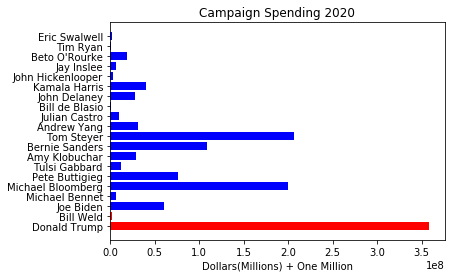

<Figure size 1440x720 with 0 Axes>

In [32]:
colors = {"Republican Party": "red", "Democratic Party": "blue", 'Democratic Party(serving as an Independent in the Senate)': "blue"}
ax = plt.barh(spending["Candidate"], spending["Receipts"], color = spending["Affiliation"].apply(lambda x: colors[x]))
plt.title("Campaign Spending 2020")
plt.xlabel("Dollars(Millions) + One Million")
plt.figure(figsize = (20,10))